#### Maestría en Inteligencia de Negocios y Análisis de Datos
#### Segundo Ciclo, Abril 2023
#### Tarea # 1
#### Marvin Chávez 08105031

Utilizando el dataset visto en clase dataHP.csv, desarrollar los procesos de ingeniería de características para proprocesar el dataset. Deberá aplicar la imputación de datos y la codificación de variables categóricas.  
Puede utilizar los criterios que quiera para cada caso. Deberá explicar cada paso realizado y por qué tomó cada decisión en particular.
El proceso debe aplicarse a todas las columnas que lo requieran, tanto numéricas como categóricas.

In [1]:
#Llamando las librerias. 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Importación Dataset
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

In [3]:
dataHP


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
#Verificación de Columnas que tiene NAN o datos que necesitan ser tratados o eliminados. 
cols_con_na = [col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
#Verificación de los tipos de datos que necesitan tratamiento o eliminación
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [6]:
#Verficacion de promedio de NAN que tiene cada columna, para poder tratar se toma base del 0.05
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [7]:
#se eliminan automaticamente las que tiene un mean mayor al 5%
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean() <= 0.05)]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [8]:
#Verifación de las columnas a tratar 
Verifiacion = dataHP[cols_rescatables].isnull().mean()
Verifiacion

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 70, dtype: float64

# Aplicacion de CCA 

In [9]:
#Se aplica a fin de no tener conlumnas que puedan modificar el modelo respetando el 5%
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape

((1460, 81), (1412, 70))

se borran eliminan 11 de las 81 columnas, y se trabajara con las 70

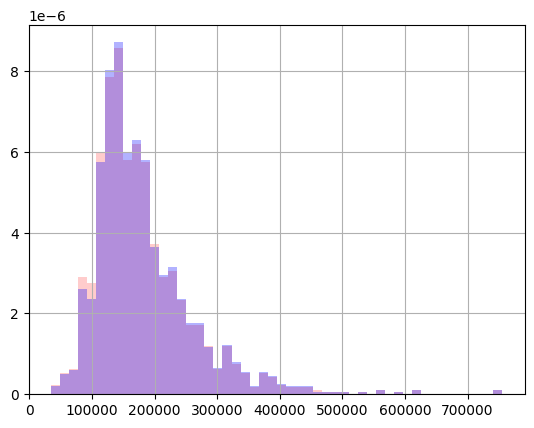

In [12]:
#Se comparan los dataset a fin de pode realizar un comprobación de los efectos de hacer CCA sobre la variable de interes.  
dataHP['SalePrice'].hist(bins=50, density=True, color='red', alpha=0.2)
data_HP_noNAN['SalePrice'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

Imputacion Media y Mediana
Tenemos de candidata a MasVnrArea

In [15]:
media = dataHP['MasVnrArea'].mean()
mediana = dataHP['MasVnrArea'].median()

print(f"Media: {media}")
print(f"Median: {mediana}")

Media: 103.68526170798899
Median: 0.0


In [18]:
dataHP['MasVnrArea_Mean'] = np.round(dataHP['MasVnrArea'].fillna(media))
dataHP['MasVnrArea_Median'] = np.round(dataHP['MasVnrArea'].fillna(mediana))

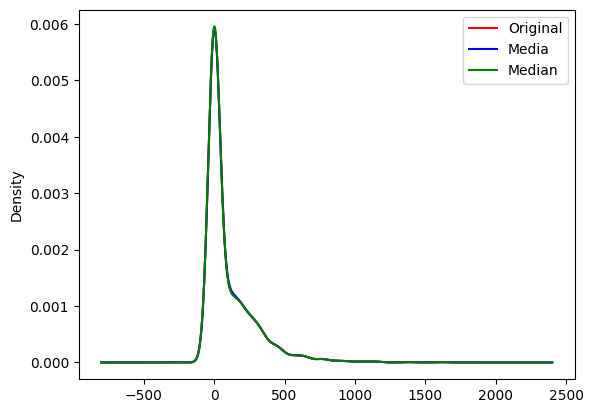

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP['MasVnrArea'].plot.density(color='red', label='Original')
dataHP['MasVnrArea_Mean'].plot.density(color='blue', label='Media')
dataHP['MasVnrArea_Median'].plot.density(color='green', label='Median')
ax.legend()

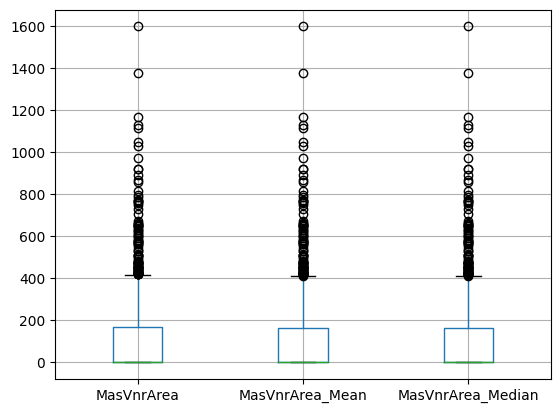

In [28]:
dataHP[['MasVnrArea', 'MasVnrArea_Mean', 'MasVnrArea_Median']].boxplot()
plt.show()